# Autocorrelation Function Analysis

## Import Libraries and Load Files

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import cmcrameri as cmc

In [2]:
import h5py
import natsort

def data_import (tumble,density,folder):
    if folder == "no-rolling":
        file = f'../persistent-exclusion-process/persistent-exclusion-process/data/{folder}/dataset_tumble_{tumble:.3f}_density_{density}.h5'
    else:
        file = f'../persistent-exclusion-process/persistent-exclusion-process/data/{folder}/dataset_tumble_{tumble:.3f}_{density}.h5'
    with h5py.File(file) as fin:
        # data = fin[[fin.keys()]]
        data= [fin [i][:] for i in natsort.natsorted(fin.keys())]
        return data

## Define Autocorrelation Function

In [3]:
def overlap(traj,i,j):
    #N = traj[i][traj[i]>0].shape[0]
    return ((traj[i]>0)*(traj[j]>0)).mean()

In [4]:
def acf_analysis (tumble,density,lags,data,rolls=1):
    acf =[]
    for i in range(0,rolls*500,rolls*10):
        a = [overlap(data,i,i+lag) for lag in lags]
        acf.append(a)

    acf = np.asarray(acf).mean(axis=0)
    #acf = acf-acf[-1]

    #acf/= acf.ptp()
    return acf

## Set System Parameters

In [5]:
rolls=1
lags = np.arange(0, rolls*100+1,1)

In [6]:
from mpl_toolkits.axes_grid1.inset_locator import inset_axes

## Print Rolled Autocorrelation For All Tumbling Rates And Comparison Between Rolled And Unrolled Data

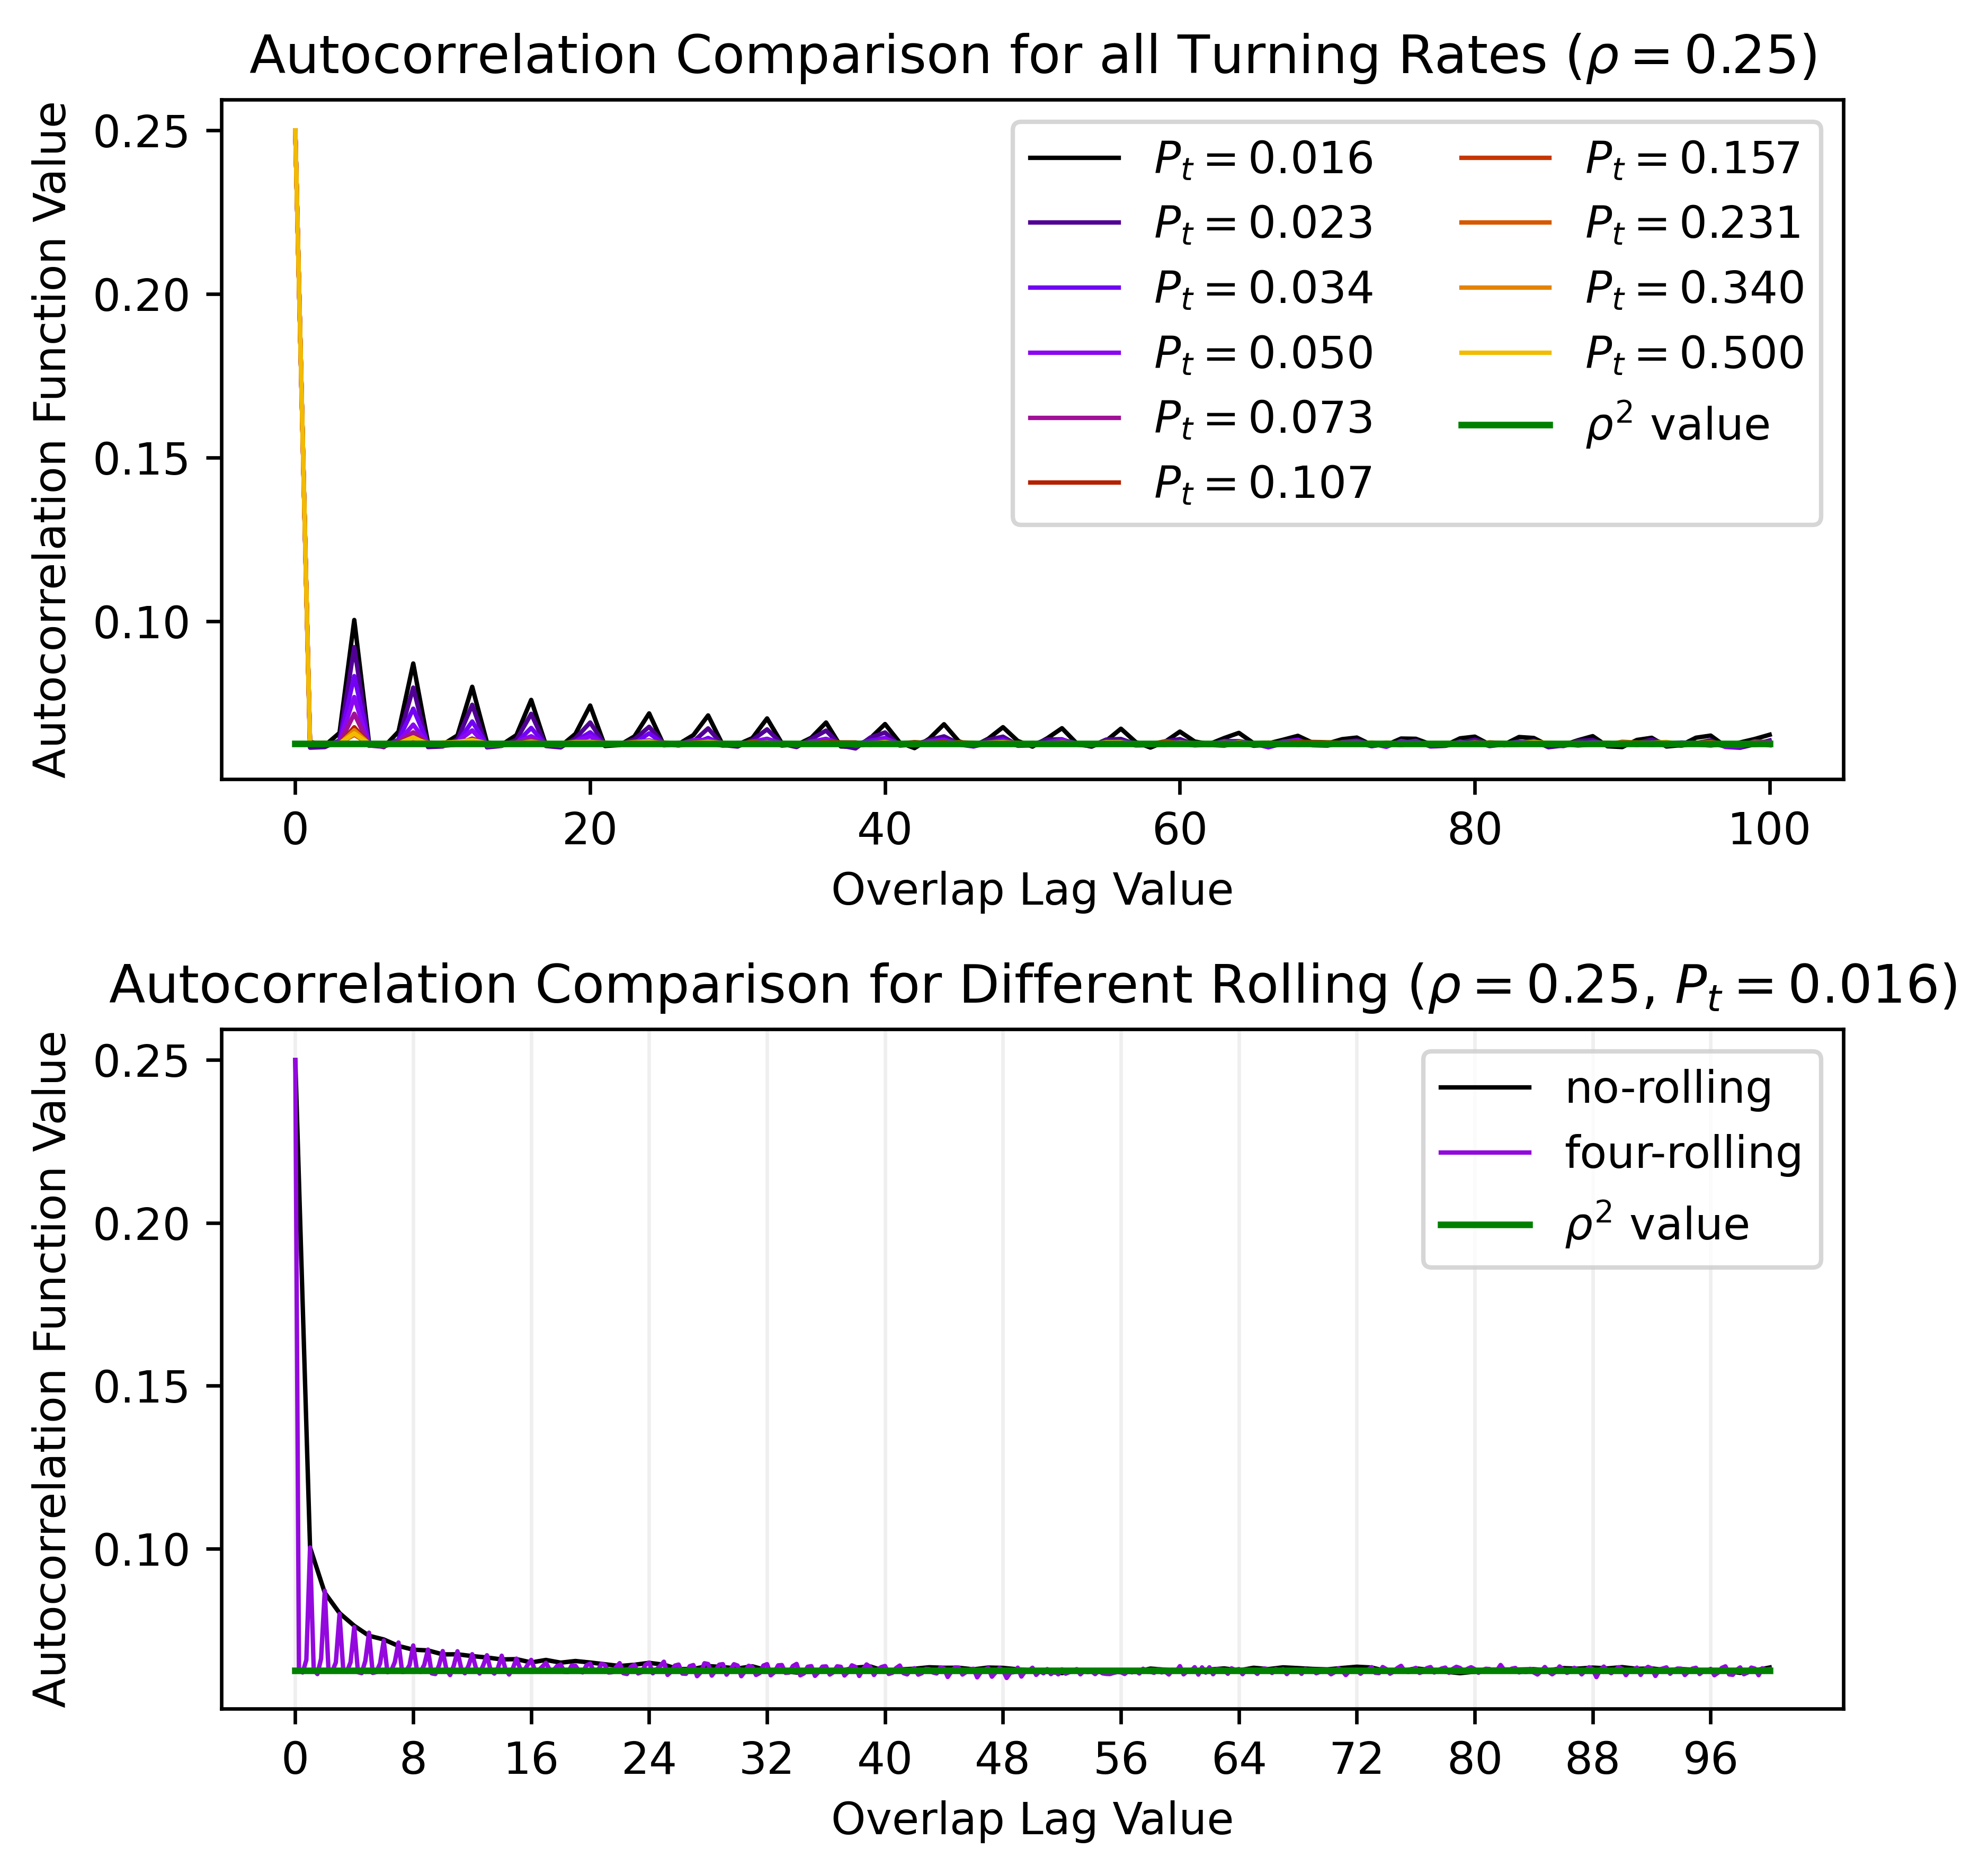

In [9]:
fig,(ax1,ax2) = plt.subplots(2,1,figsize=(6,6),dpi=600)
density = 0.25
tumbles = [0.016,0.023,0.034,0.050,0.073,0.107,0.157,0.231,0.340,0.500]
#subax1 = inset_axes(ax1,width="60%",height="60%",loc="upper right")
for i,tumble in enumerate(tumbles):
    data = np.array(data_import(tumble,density,folder="four-rolling"))
    acf = acf_analysis(tumble,density,lags,data,rolls=1)
    ax1.plot(lags,acf,label=f"$P_t={tumble:.3f}$",linewidth=1,color=plt.cm.gnuplot(i/len(tumbles)))
    #subax1.plot(lags,acf,label=f"$P_t={tumble:.3f}$",linewidth=1,color=plt.cm.gnuplot(i/len(tumbles)))

ax1.plot(lags,np.ones_like(lags)*density**2,color='green',label=r"$\rho^2$ value")
#subax1.plot(lags,np.ones_like(lags)*density**2,color='green',label=r"$\rho^2$ value")
#subax1.set_ylim([0.02,0.06])
ax1.set_ylabel("Autocorrelation Function Value")
ax1.set_xlabel("Overlap Lag Value")
#ax.set_ylim([0.02,0.06])
#ax.set_xlim([0,400])
#ax.set_xscale("log")
ax1.set_title(r"Autocorrelation Comparison for all Turning Rates ($\rho=%0.2f$)" % (density))
ax1.legend(loc="upper right",ncols=2)

#FIRST SUBGRAPH


#SECOND GRAPH

#subax2 = inset_axes(ax2,width="60%",height="60%",loc="upper right")
density = 0.25
tumble = 0.016
folders = ["no-rolling","four-rolling","less-rolling"]
lags2 = np.arange(0, 4*100+1,1)
for i,folder in enumerate(folders):
    data = np.array(data_import(tumble,density,folder))
    if i==0:
        acf = acf_analysis(tumble,density,lags,data)
        ax2.plot(lags,acf,label=folder,linewidth=1,color=plt.cm.gnuplot(i/len(folders)))
    if i==1:
        acf = acf_analysis(tumble,density,lags2,data)
        ax2.plot(lags2/4.0,acf,label=folder,linewidth=1,color=plt.cm.gnuplot(i/len(folders)))

ax2.plot(lags,np.ones_like(lags)*density**2,color='green',label=r"$\rho^2$ value")
#subax2.plot(lags,np.ones_like(lags)*density**2,color='green',label=r"$\rho^2$ value")

#ax.set_ylim([0.02,0.03])
ax2.set_title(r"Autocorrelation Comparison for Different Rolling ($\rho = %0.2f$, $P_t = %0.3f$)" % (density, tumble))
ticks = []
for x in range(0,101,8):
    ticks.append(x)
ax2.set_xticks(ticks)
ax2.grid(visible=None,which='major',axis='x',alpha=0.2)
#subax2.grid(visible=None,which='major',axis='x',alpha=0.2)
#subax2.set_ylim([0.02,0.03])
ax2.set_ylabel("Autocorrelation Function Value")
ax2.set_xlabel("Overlap Lag Value")
ax2.legend(loc="upper right")

plt.tight_layout()
plt.show()

